##Встановлення потрібних бібліотек

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=988927f4ddd6cf9da572b568750a208122919bf0d49e5c842130148eda04e0f2
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
pd.options.display.max_columns = 999
pd.options.display.max_rows = 50
from sklearn.metrics import roc_curve
from matplotlib import pyplot
import eli5
import json
from matplotlib.patches import Arc



# Робота з першим датасетом

In [ ]:
with open('events_England.json') as user_file:
  data = user_file.read()

parsed_json = json.loads(data)
train = pd.DataFrame(parsed_json)

In [ ]:
train

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175
...,...,...,...,...,...,...,...,...,...,...,...,...
643145,5,Ball out of the field,[],0,"[{'y': 32, 'x': 0}, {'y': 100, 'x': 100}]",2500098,Interruption,1623,2H,2796.732525,50,251596409
643146,3,Corner,"[{'id': 302}, {'id': 801}, {'id': 1801}]",70965,"[{'y': 100, 'x': 100}, {'y': 47, 'x': 88}]",2500098,Free Kick,1633,2H,2829.821084,30,251596232
643147,1,Air duel,"[{'id': 701}, {'id': 1802}]",7919,"[{'y': 53, 'x': 12}, {'y': 50, 'x': 14}]",2500098,Duel,1623,2H,2831.211419,10,251596410
643148,1,Air duel,"[{'id': 703}, {'id': 1801}]",8005,"[{'y': 47, 'x': 88}, {'y': 50, 'x': 86}]",2500098,Duel,1633,2H,2832.434399,10,251596234


In [ ]:
pd.unique(train['subEventName'])

array(['Simple pass', 'High pass', 'Head pass', 'Air duel',
       'Ground loose ball duel', 'Smart pass', 'Launch',
       'Ground defending duel', 'Ground attacking duel', 'Foul',
       'Free Kick', 'Cross', 'Shot', 'Reflexes', 'Touch', 'Clearance',
       'Ball out of the field', 'Throw in', 'Goal kick', 'Corner',
       'Goalkeeper leaving line', 'Hand pass', 'Acceleration',
       'Save attempt', '', 'Free kick cross', 'Free kick shot',
       'Hand foul', 'Violent Foul', 'Protest', 'Whistle',
       'Late card foul', 'Out of game foul', 'Penalty', 'Time lost foul',
       'Simulation'], dtype=object)

In [ ]:
shots=train[train['subEventName']=='Shot']

In [ ]:
shots

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212
62,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280
128,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100,177959289
249,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100,177959429
...,...,...,...,...,...,...,...,...,...,...,...,...
642945,10,Shot,"[{'id': 401}, {'id': 1212}, {'id': 1802}]",8561,"[{'y': 45, 'x': 72}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,1972.969422,100,251596053
643023,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",41174,"[{'y': 33, 'x': 86}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,2193.887080,100,251596096
643051,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...",7879,"[{'y': 62, 'x': 88}, {'y': 100, 'x': 100}]",2500098,Shot,1623,2H,2377.197700,100,251596357
643055,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1206}, {'id'...",145692,"[{'y': 38, 'x': 92}, {'y': 100, 'x': 100}]",2500098,Shot,1623,2H,2381.481625,100,251596359


In [ ]:
shots.subEventName.unique()

array(['Shot'], dtype=object)

1.   Вираховую кут доворіт за формулою: arctan(⁡θ=7.32x/(x^2+y^2-((7.32/2))^2 )

2.   tag id == 403 - удари головою
3.   tag id == 101 - голи


In [ ]:
shots_model=pd.DataFrame(columns=['Goal','X','Y'])

for i,shot in shots.iterrows():
    header=0
    for shottags in shot['tags']:
        if shottags['id']==403:
            header=1       
    if not(header):        
        shots_model.at[i,'X']=100-shot['positions'][0]['x']
        shots_model.at[i,'Y']=shot['positions'][0]['y']
        shots_model.at[i,'C']=abs(shot['positions'][0]['y']-50)
        x=shots_model.at[i,'X']*105/100
        y=shots_model.at[i,'C']*65/100
        shots_model.at[i,'Distance']=np.sqrt(x**2 + y**2)
        a = np.arctan(7.32 *x /(x**2 + y**2 - (7.32/2)**2))
        if a<0:
            a=np.pi+a
        shots_model.at[i,'Angle'] =a
        shots_model.at[i,'Goal']=0
        for shottags in shot['tags']:
                if shottags['id']==101:
                    shots_model.at[i,'Goal']=1

In [ ]:
shots_model

,Goal,X,Y,C,Distance,Angle
46,1,12,41,9.0,13.891814,0.474451
62,0,15,52,2.0,15.803560,0.453823
128,0,19,33,17.0,22.805811,0.280597
249,0,25,30,20.0,29.292704,0.223680
394,0,10,39,11.0,12.703248,0.479051
...,...,...,...,...,...,...
642939,0,14,40,10.0,16.072959,0.413920
642945,0,28,45,5.0,29.579089,0.244789
643023,1,14,33,17.0,18.390011,0.319916
643051,0,12,62,12.0,14.818907,0.420593


Вивід футбольного майданчика

In [ ]:
def createGoalMouth():
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    linecolor='black'
    #Pitch Outline & Centre Line
    plt.plot([0,65],[0,0], color=linecolor)
    plt.plot([65,65],[50,0], color=linecolor)
    plt.plot([0,0],[50,0], color=linecolor)
    #Left Penalty Area
    plt.plot([12.5,52.5],[16.5,16.5],color=linecolor)
    plt.plot([52.5,52.5],[16.5,0],color=linecolor)
    plt.plot([12.5,12.5],[0,16.5],color=linecolor)
    #Left 6-yard Box
    plt.plot([41.5,41.5],[5.5,0],color=linecolor)
    plt.plot([23.5,41.5],[5.5,5.5],color=linecolor)
    plt.plot([23.5,23.5],[0,5.5],color=linecolor)
    #Goal
    plt.plot([41.5-5.34,41.5-5.34],[-2,0],color=linecolor)
    plt.plot([23.5+5.34,41.5-5.34],[-2,-2],color=linecolor)
    plt.plot([23.5+5.34,23.5+5.34],[0,-2],color=linecolor)
    #Prepare Circles
    leftPenSpot = plt.Circle((65/2,11),0.8,color=linecolor)
    #Draw Circles
    ax.add_patch(leftPenSpot)
    #Prepare Arcs
    leftArc = Arc((32.5,11),height=18.3,width=18.3,angle=0,theta1=38,theta2=142,color=linecolor)
    #Draw Arcs
    ax.add_patch(leftArc)
    #Tidy Axes
    plt.axis('off')
    return fig,ax

Виведу два графіки в яких покажу з яких місць на футбольному полі наносились удари, і з яких місць забивались голи. 

In [ ]:
H_Shot=np.histogram2d(shots_model['X'], shots_model['Y'],bins=50,range=[[0, 100],[0, 100]])
goals_only=shots_model[shots_model['Goal']==1]
H_Goal=np.histogram2d(goals_only['X'], goals_only['Y'],bins=50,range=[[0, 100],[0, 100]])

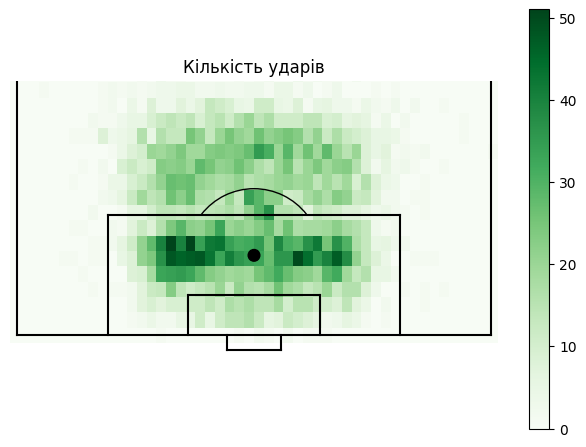

In [ ]:
(fig,ax) = createGoalMouth()
pos=ax.imshow(H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Greens)
fig.colorbar(pos, ax=ax)
ax.set_title('Кількість ударів')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

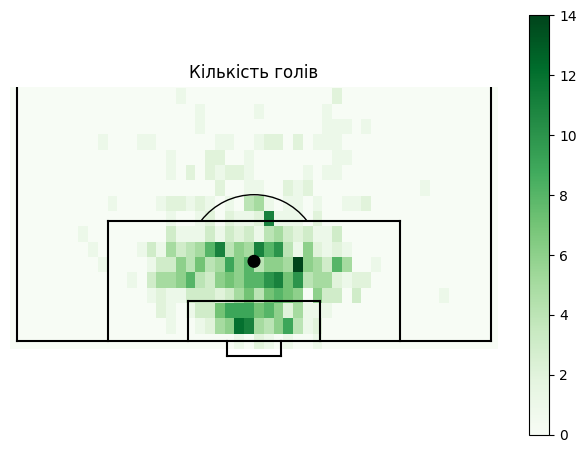

In [ ]:
(fig,ax) = createGoalMouth()
pos=ax.imshow(H_Goal[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Greens)
fig.colorbar(pos, ax=ax)
ax.set_title('Кількість голів')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()  

Припустимо, що ймовірність забиття голу буде дорівнювати кількості голів поділеної на кількість ударів. Виведемо отриманий графік 

<ipython-input-112-b8e83a3e14b5>:2: RuntimeWarning: invalid value encountered in true_divide
  pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Greens,vmin=0, vmax=0.5)


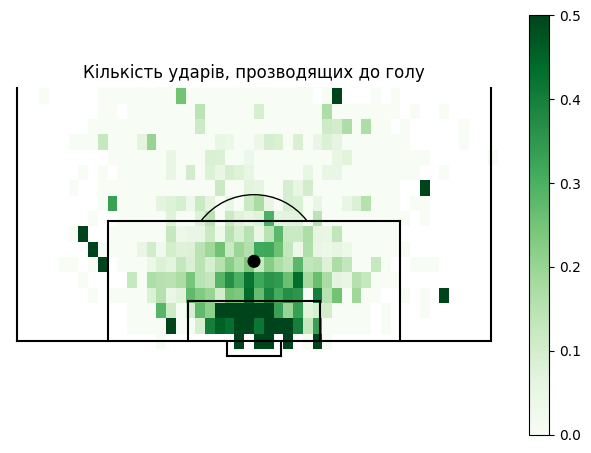

In [ ]:
(fig,ax) = createGoalMouth()
pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Greens,vmin=0, vmax=0.5)
fig.colorbar(pos, ax=ax)
ax.set_title('Кількість ударів, прозводящих до голу')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Підготовка даних для тренування моделі

In [ ]:
shots_model.dtypes

Goal         object
X            object
Y            object
C           float64
Distance    float64
Angle       float64
dtype: object

In [ ]:
shots_model['Y'] = pd.to_numeric(shots_model['Y'])
shots_model['X'] = pd.to_numeric(shots_model['X'])
shots_model['Goal'] = pd.to_numeric(shots_model['Goal'])
shots_model.dtypes

Goal          int64
X             int64
Y             int64
C           float64
Distance    float64
Angle       float64
dtype: object

Тренування моделі логістичної регресії

In [ ]:
X = shots_model.iloc[:,1:]
y = shots_model.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
X_train

,X,Y,C,Distance,Angle
108231,17,37,13.0,19.749051,0.333932
177235,20,36,14.0,22.886896,0.292527
62666,24,37,13.0,26.578986,0.260133
142660,17,39,11.0,19.228755,0.351446
154137,4,44,6.0,5.731492,1.006617
...,...,...,...,...,...
74110,12,42,8.0,13.630847,0.491234
462097,28,33,17.0,31.408001,0.217661
354463,25,60,10.0,27.042790,0.261520
19519,12,23,27.0,21.604687,0.200699


In [ ]:
model = LogisticRegression(max_iter=600)
model.fit(X_train, y_train)

LogisticRegression(max_iter=600)

In [ ]:
print('ROC-AUC = {}%'.format(round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])*100),2))

ROC-AUC = 77%


Text(0.5, 1.0, 'ROC-крива')

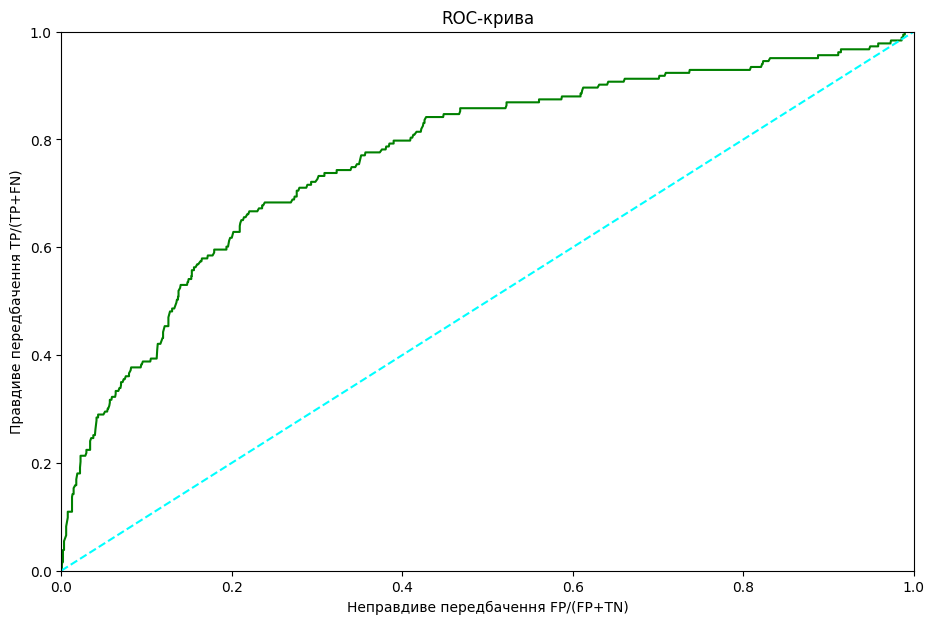

In [ ]:
fig, axes = plt.subplots(figsize=(11,7))

fpr, tpr, _  = roc_curve(y_test,model.predict_proba(X_test)[:, 1])
plt.plot(fpr,tpr,label='Distance Predictor',c='green')

y_45 = np.linspace(0,1,100) 
plt.plot(y_45,y_45,linestyle='dashed',c='cyan')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('Неправдиве передбачення FP/(FP+TN)')
plt.ylabel('Правдиве передбачення TP/(TP+FN)')
plt.title('ROC-крива')

In [ ]:
eli5.explain_weights(model, feature_names=list(X_train.columns))

Weight?,Feature
+0.910,Angle
+0.084,X
+0.007,C
-0.003,Y
-0.123,<BIAS>
-0.213,Distance


Змінимо параметри моделі

In [ ]:
shots_model_0 = shots_model.drop(["X", "C", "Y"], axis=1)

In [ ]:
shots_model_0

,Goal,Distance,Angle
46,1,13.891814,0.474451
62,0,15.803560,0.453823
128,0,22.805811,0.280597
249,0,29.292704,0.223680
394,0,12.703248,0.479051
...,...,...,...
642939,0,16.072959,0.413920
642945,0,29.579089,0.244789
643023,1,18.390011,0.319916
643051,0,14.818907,0.420593


In [ ]:
X = shots_model_0.iloc[:,1:]
y = shots_model_0.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
X_train

,Distance,Angle
108231,19.749051,0.333932
177235,22.886896,0.292527
62666,26.578986,0.260133
142660,19.228755,0.351446
154137,5.731492,1.006617
...,...,...
74110,13.630847,0.491234
462097,31.408001,0.217661
354463,27.042790,0.261520
19519,21.604687,0.200699


In [ ]:
model_0 = LogisticRegression(max_iter=600)
model_0.fit(X_train, y_train)

LogisticRegression(max_iter=600)

In [ ]:
print('ROC-AUC = {}%'.format(round(roc_auc_score(y_test, model_0.predict_proba(X_test)[:, 1])*100),2))

ROC-AUC = 77%


Text(0.5, 1.0, 'ROC Graph')

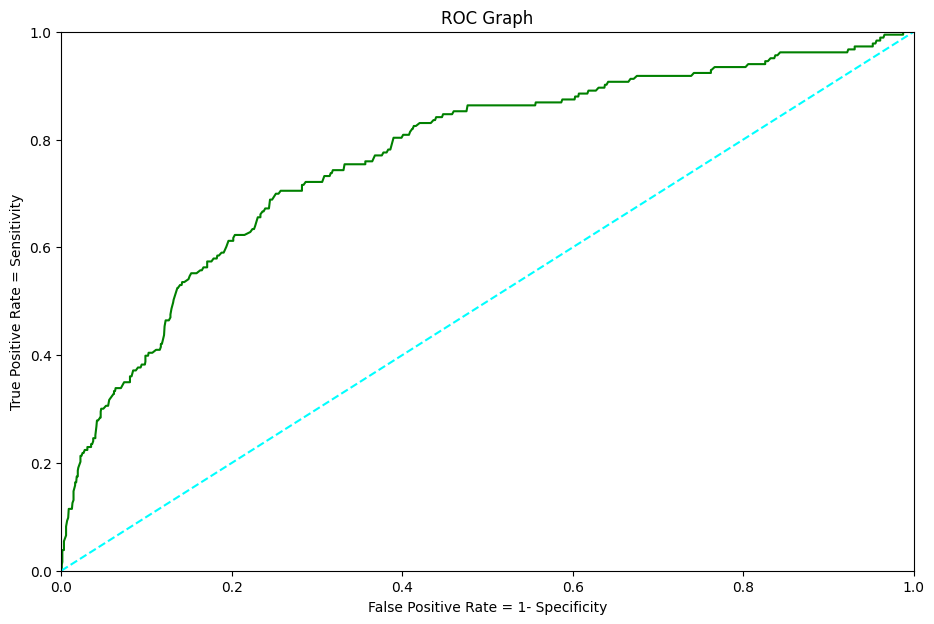

In [ ]:
fig, axes = plt.subplots(figsize=(11,7))
fpr, tpr, _  = roc_curve(y_test,model_0.predict_proba(X_test)[:, 1])
plt.plot(fpr,tpr,label='Distance Predictor',c='green')

y_45 = np.linspace(0,1,100) 
plt.plot(y_45,y_45,linestyle='dashed',c='cyan')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC Graph')

In [ ]:
eli5.explain_weights(model_0, feature_names=list(X_train.columns))

Weight?,Feature
+1.275,Angle
-0.121,Distance
-0.767,<BIAS>


Пробуємо додати дистанцію в квадарті в модель

In [ ]:
squaredD = shots_model['Distance']**2
shots_model_1 = shots_model.assign(D2=squaredD)
shots_model_1

,Goal,X,Y,C,Distance,Angle,D2
46,1,12,41,9.0,13.891814,0.474451,192.9825
62,0,15,52,2.0,15.803560,0.453823,249.7525
128,0,19,33,17.0,22.805811,0.280597,520.1050
249,0,25,30,20.0,29.292704,0.223680,858.0625
394,0,10,39,11.0,12.703248,0.479051,161.3725
...,...,...,...,...,...,...,...
642939,0,14,40,10.0,16.072959,0.413920,258.3400
642945,0,28,45,5.0,29.579089,0.244789,874.9225
643023,1,14,33,17.0,18.390011,0.319916,338.1925
643051,0,12,62,12.0,14.818907,0.420593,219.6000


In [ ]:
X = shots_model_1.iloc[:,1:]
y = shots_model_1.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
X_train

,X,Y,C,Distance,Angle,D2
108231,17,37,13.0,19.749051,0.333932,390.0250
177235,20,36,14.0,22.886896,0.292527,523.8100
62666,24,37,13.0,26.578986,0.260133,706.4425
142660,17,39,11.0,19.228755,0.351446,369.7450
154137,4,44,6.0,5.731492,1.006617,32.8500
...,...,...,...,...,...,...
74110,12,42,8.0,13.630847,0.491234,185.8000
462097,28,33,17.0,31.408001,0.217661,986.4625
354463,25,60,10.0,27.042790,0.261520,731.3125
19519,12,23,27.0,21.604687,0.200699,466.7625


In [ ]:
model_1 = LogisticRegression(max_iter=600)
model_1.fit(X_train, y_train)

LogisticRegression(max_iter=600)

In [ ]:
print('ROC-AUC = {}%'.format(round(roc_auc_score(y_test, model_1.predict_proba(X_test)[:, 1])*100),2))

ROC-AUC = 77%


Text(0.5, 1.0, 'ROC Graph')

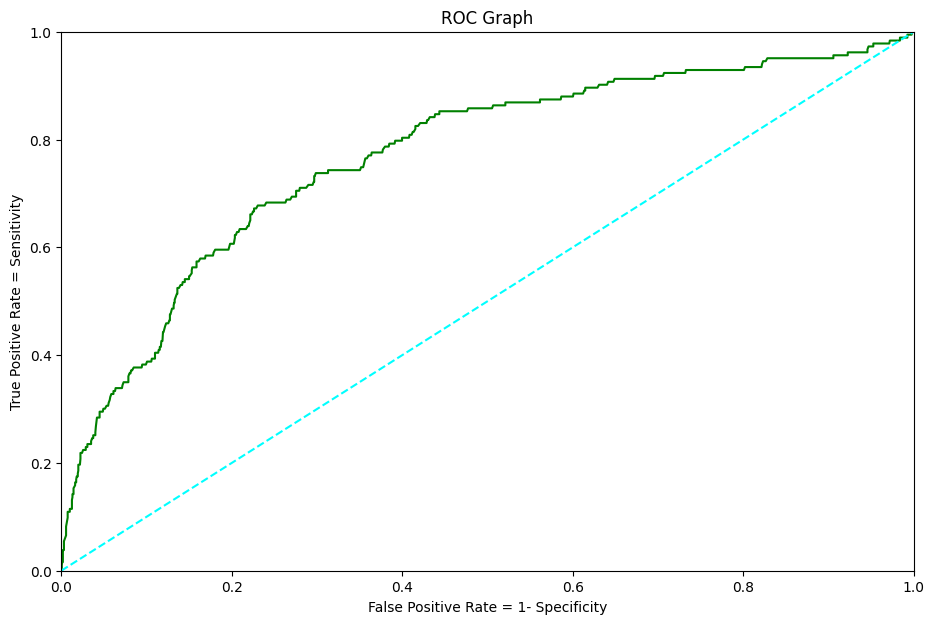

In [ ]:
fig, axes = plt.subplots(figsize=(11,7))

fpr, tpr, _  = roc_curve(y_test,model_1.predict_proba(X_test)[:, 1])
plt.plot(fpr,tpr,label='Distance Predictor',c='green')


y_45 = np.linspace(0,1,100) 
plt.plot(y_45,y_45,linestyle='dashed',c='cyan')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC Graph')

Пробуємо додати ще параметри

In [ ]:
squaredX = shots_model['X']**2
AX = shots_model['Angle']*shots_model['X']
squaredC = shots_model['C']**2
shots_model_2 = shots_model.assign(C2=squaredC,X2=squaredX,AX=AX)

In [ ]:
shots_model_2

,Goal,X,Y,C,Distance,Angle,C2,X2,AX
46,1,12,41,9.0,13.891814,0.474451,81.0,144,5.693417
62,0,15,52,2.0,15.803560,0.453823,4.0,225,6.807350
128,0,19,33,17.0,22.805811,0.280597,289.0,361,5.331341
249,0,25,30,20.0,29.292704,0.223680,400.0,625,5.591988
394,0,10,39,11.0,12.703248,0.479051,121.0,100,4.790511
...,...,...,...,...,...,...,...,...,...
642939,0,14,40,10.0,16.072959,0.413920,100.0,196,5.794880
642945,0,28,45,5.0,29.579089,0.244789,25.0,784,6.854088
643023,1,14,33,17.0,18.390011,0.319916,289.0,196,4.478825
643051,0,12,62,12.0,14.818907,0.420593,144.0,144,5.047120


In [ ]:
X = shots_model_2.iloc[:,1:]
y = shots_model_2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
model_2 = LogisticRegression(max_iter=400)
model_2.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [ ]:
print('ROC-AUC = {}%'.format(round(roc_auc_score(y_test, model_2.predict_proba(X_test)[:, 1])*100),2))

ROC-AUC = 77%


Text(0.5, 1.0, 'ROC Graph')

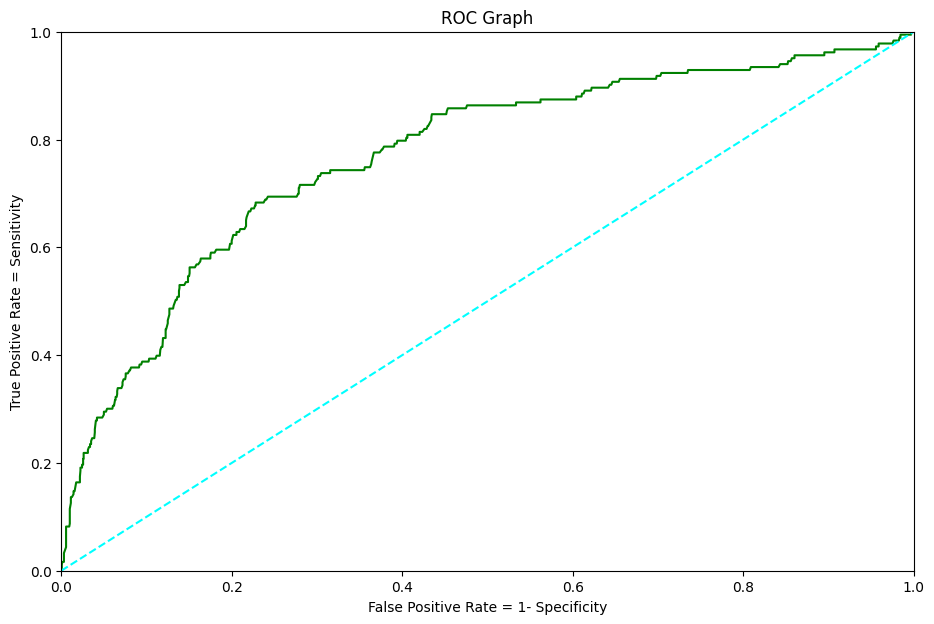

In [ ]:
fig, axes = plt.subplots(figsize=(11,7))

fpr, tpr, _  = roc_curve(y_test,model_2.predict_proba(X_test)[:, 1])
plt.plot(fpr,tpr,label='Distance Predictor',c='green')


y_45 = np.linspace(0,1,100) 
plt.plot(y_45,y_45,linestyle='dashed',c='cyan')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC Graph')

Будуємо модель Градієнтного бустингу

In [ ]:
X = shots_model.iloc[:,1:]
y = shots_model.iloc[:,0]
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
X_train_g

,X,Y,C,Distance,Angle
108231,17,37,13.0,19.749051,0.333932
177235,20,36,14.0,22.886896,0.292527
62666,24,37,13.0,26.578986,0.260133
142660,17,39,11.0,19.228755,0.351446
154137,4,44,6.0,5.731492,1.006617
...,...,...,...,...,...
74110,12,42,8.0,13.630847,0.491234
462097,28,33,17.0,31.408001,0.217661
354463,25,60,10.0,27.042790,0.261520
19519,12,23,27.0,21.604687,0.200699


In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def model_setup(params): 
    model_g = GradientBoostingClassifier(
                        learning_rate=params['learning_rate'],
                        min_samples_leaf=params['min_samples_leaf'],
                        max_depth = params['max_depth'],
                        max_features = params['max_features']
                        )

    model_g.fit(X_train_g, y_train_g)
    return {
        'learning_rate': params['learning_rate'],
        'min_samples_leaf': params['min_samples_leaf'],
        'max_depth': params['max_depth'],
        'max_features': params['max_features'],
        'train_ROCAUC': roc_auc_score(y_train, model_g.predict_proba(X_train)[:, 1]),
        'test_ROCAUC': roc_auc_score(y_test, model_g.predict_proba(X_test)[:, 1]),
    }

def objective(params):
    res = model_setup(params)
    res['loss'] = - res['test_ROCAUC']
    res['status'] = STATUS_OK
    return res

search_space = {
        'learning_rate': hp.uniform('learning_rate', 0.05, 0.3),
        'min_samples_leaf': hp.choice('min_samples_leaf', range(15, 200)),
        'max_depth': hp.choice('max_depth', range(2, 20)),
        'max_features': hp.choice('max_features', range(3, 27))
}

In [ ]:
trials = Trials()
fmin(
    objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
);

100%|██████████| 50/50 [00:53<00:00,  1.06s/trial, best loss: -0.7701760853018775]


In [ ]:
pd.DataFrame(trials.results).sort_values(by='test_ROCAUC', ascending=False).head(5)

,learning_rate,min_samples_leaf,max_depth,max_features,train_ROCAUC,test_ROCAUC,loss,status
44,0.050760,82,2,7,0.805466,0.770176,-0.770176,ok
18,0.191465,80,3,24,0.840620,0.769722,-0.769722,ok
47,0.050112,195,2,13,0.804221,0.769376,-0.769376,ok
42,0.082403,90,2,7,0.809805,0.769323,-0.769323,ok
45,0.172652,88,2,21,0.819708,0.769147,-0.769147,ok


In [ ]:
model_g = GradientBoostingClassifier(
                        learning_rate=0.050760,
                        min_samples_leaf=82,
                        max_depth = 2,
                        max_features =7
                        )
model_g.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05076, max_depth=2, max_features=7,
                           min_samples_leaf=82)

In [ ]:
print('Our classifier obtains an ROC-AUC of {}%'.format(round(roc_auc_score(y_test, model_g.predict_proba(X_test)[:, 1])*100),2))

Our classifier obtains an ROC-AUC of 77%


Порівняння двох методів

Text(0.5, 1.0, 'ROC-крива')

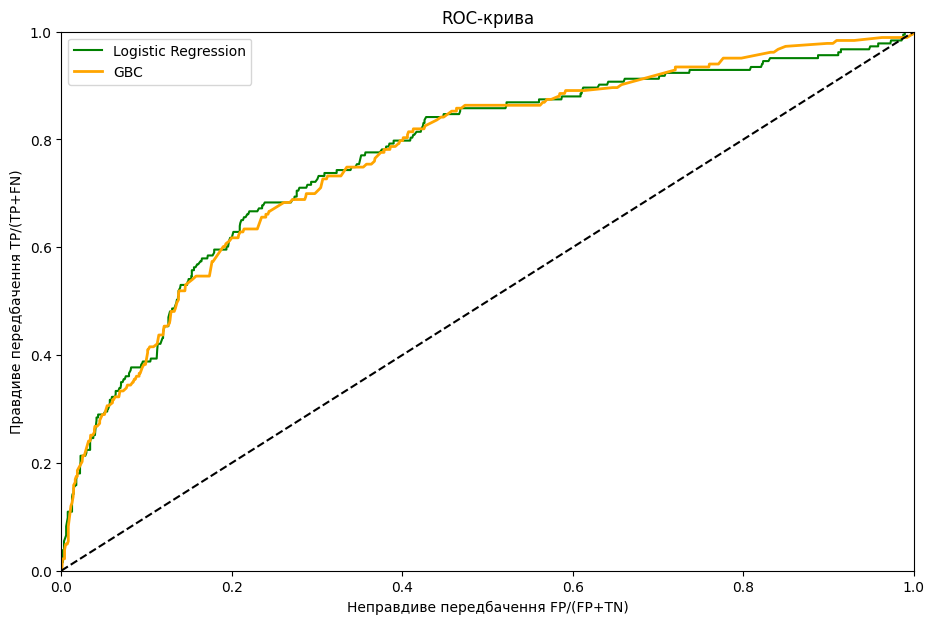

In [ ]:
fig, axes = plt.subplots(figsize=(11,7))

fpr, tpr, _  = roc_curve(y_test_g,model.predict_proba(X_test_g)[:, 1])
plt.plot(fpr,tpr,label='Logistic Regression',c='green')

fpr2, tpr2, _  = roc_curve(y_test_g,model_g.predict_proba(X_test_g)[:, 1])
plt.plot(fpr2,tpr2,label='GBC',c='orange',linewidth=2)

y_45 = np.linspace(0,1,100) 
plt.plot(y_45,y_45,linestyle='dashed',c='black')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(['Logistic Regression', 'GBC'])
plt.xlabel('Неправдиве передбачення FP/(FP+TN)')
plt.ylabel('Правдиве передбачення TP/(TP+FN)')
plt.title('ROC-крива')

In [ ]:
eli5.explain_weights(model_g, feature_names=list(X_train.columns))

Weight,Feature
0.6498 ± 0.6736,Angle
0.2871 ± 0.6207,Distance
0.0389 ± 0.5188,X
0.0170 ± 0.5518,C
0.0072 ± 0.4750,Y


# Робота з другим набором даних

In [ ]:
events_data = pd.read_csv('events.csv')
ginf_data = pd.read_csv('ginf.csv')

In [ ]:
events_data

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,z5L2OT5E123,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,8,NaN,2,Sampdoria,Atalanta,lucas torreira,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
941005,z5L2OT5E/,z5L2OT5E124,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",2,NaN,2,Sampdoria,Atalanta,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
941006,z5L2OT5E/,z5L2OT5E125,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,1,12.0,2,Sampdoria,Atalanta,fabio quagliarella,lucas torreira,NaN,NaN,8.0,2.0,0,9.0,1.0,1,3.0,0
941007,z5L2OT5E/,z5L2OT5E126,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,8,NaN,1,Atalanta,Sampdoria,alberto grassi,NaN,NaN,NaN,NaN,NaN,0,4.0,NaN,0,NaN,0


In [ ]:
ginf_data

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,xAkY8l6R/,/soccer/italy/serie-a/genoa-crotone-xAkY8l6R/,True,2017-01-22,I1,2017,italy,Genoa,Crotone,2,2,1.97,4.35,8.00,1.95,2.03,2.03,1.86
10108,xSU9scI9/,/soccer/england/premier-league/chelsea-hull-ci...,True,2017-01-22,E0,2017,england,Chelsea,Hull,2,0,1.19,8.50,20.00,1.54,2.68,2.40,1.66
10109,xY7uZwOI/,/soccer/france/ligue-1/monaco-lorient-xY7uZwOI/,True,2017-01-22,F1,2017,france,AS Monaco,Lorient,4,0,1.32,6.24,11.50,1.53,3.08,1.80,2.25
10110,YyeGxMX8/,/soccer/spain/laliga/betis-gijon-YyeGxMX8/,True,2017-01-22,SP1,2017,spain,Real Betis,Sporting Gijon,0,0,1.74,4.07,5.90,2.20,1.89,2.05,1.86


Формуємо єдиний датасет для роботи

In [203]:
events_data = events_data.merge(ginf_data[['id_odsp', 'country', 'date']], on='id_odsp', how='left')
events_data

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0,germany,2011-08-05
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,germany,2011-08-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,z5L2OT5E123,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,8,NaN,2,Sampdoria,Atalanta,lucas torreira,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,italy,2017-01-22
941005,z5L2OT5E/,z5L2OT5E124,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",2,NaN,2,Sampdoria,Atalanta,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,italy,2017-01-22
941006,z5L2OT5E/,z5L2OT5E125,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,1,12.0,2,Sampdoria,Atalanta,fabio quagliarella,lucas torreira,NaN,NaN,8.0,2.0,0,9.0,1.0,1,3.0,0,italy,2017-01-22
941007,z5L2OT5E/,z5L2OT5E126,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,8,NaN,1,Atalanta,Sampdoria,alberto grassi,NaN,NaN,NaN,NaN,NaN,0,4.0,NaN,0,NaN,0,italy,2017-01-22


In [204]:
extract_year = lambda x: datetime.strptime(x, "%Y-%m-%d").year
events_data['year'] = [extract_year(x) for key, x in enumerate(events_data['date'])]
events_data

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,year
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0,germany,2011-08-05,2011
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2011
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2011
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2011
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,germany,2011-08-05,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,z5L2OT5E123,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,8,NaN,2,Sampdoria,Atalanta,lucas torreira,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,italy,2017-01-22,2017
941005,z5L2OT5E/,z5L2OT5E124,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",2,NaN,2,Sampdoria,Atalanta,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,italy,2017-01-22,2017
941006,z5L2OT5E/,z5L2OT5E125,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,1,12.0,2,Sampdoria,Atalanta,fabio quagliarella,lucas torreira,NaN,NaN,8.0,2.0,0,9.0,1.0,1,3.0,0,italy,2017-01-22,2017
941007,z5L2OT5E/,z5L2OT5E126,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,8,NaN,1,Atalanta,Sampdoria,alberto grassi,NaN,NaN,NaN,NaN,NaN,0,4.0,NaN,0,NaN,0,italy,2017-01-22,2017


Вибираємо event_type=1 (удари по воротам)

In [205]:
shots = events_data[events_data.event_type==1]
shots['player'] = shots['player'].str.title()
shots['player2'] = shots['player2'].str.title()
shots['country'] = shots['country'].str.title()

<ipython-input-205-3bb51dd29d41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['player'] = shots['player'].str.title()
<ipython-input-205-3bb51dd29d41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['player2'] = shots['player2'].str.title()
<ipython-input-205-3bb51dd29d41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [206]:
shots

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,year
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,Mladen Petric,Gokhan Tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0,Germany,2011-08-05,2011
11,UFot0hit/,UFot0hit12,12,14,Attempt missed. Shinji Kagawa (Borussia Dortmu...,1,12.0,1,Borussia Dortmund,Hamburg SV,Shinji Kagawa,Mario Gotze,NaN,NaN,13.0,2.0,0,15.0,1.0,1,1.0,0,Germany,2011-08-05,2011
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,Kevin Grosskreutz,Mario Gotze,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0,Germany,2011-08-05,2011
14,UFot0hit/,UFot0hit15,15,19,Attempt blocked. Mats Hummels (Borussia Dortmu...,1,NaN,1,Borussia Dortmund,Hamburg SV,Mats Hummels,NaN,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0,Germany,2011-08-05,2011
17,UFot0hit/,UFot0hit18,18,20,Attempt blocked. Tomas Rincon (Hamburg) right ...,1,NaN,2,Hamburg SV,Borussia Dortmund,Tomas Rincon,NaN,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0,Germany,2011-08-05,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,z5L2OT5E/,z5L2OT5E102,102,81,Attempt blocked. Remo Freuler (Atalanta) right...,1,NaN,1,Atalanta,Sampdoria,Remo Freuler,NaN,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0,Italy,2017-01-22,2017
940991,z5L2OT5E/,z5L2OT5E110,110,84,Attempt missed. Alberto Grassi (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,Alberto Grassi,Remo Freuler,NaN,NaN,10.0,2.0,0,15.0,1.0,1,1.0,0,Italy,2017-01-22,2017
940992,z5L2OT5E/,z5L2OT5E111,111,86,Attempt saved. Alejandro Gomez (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,Alejandro Gomez,Andrea Petagna,NaN,NaN,5.0,1.0,0,9.0,1.0,1,1.0,0,Italy,2017-01-22,2017
940993,z5L2OT5E/,z5L2OT5E112,112,87,Attempt saved. Fabio Quagliarella (Sampdoria) ...,1,12.0,2,Sampdoria,Atalanta,Fabio Quagliarella,Luis Muriel,NaN,NaN,5.0,1.0,0,15.0,1.0,1,1.0,0,Italy,2017-01-22,2017


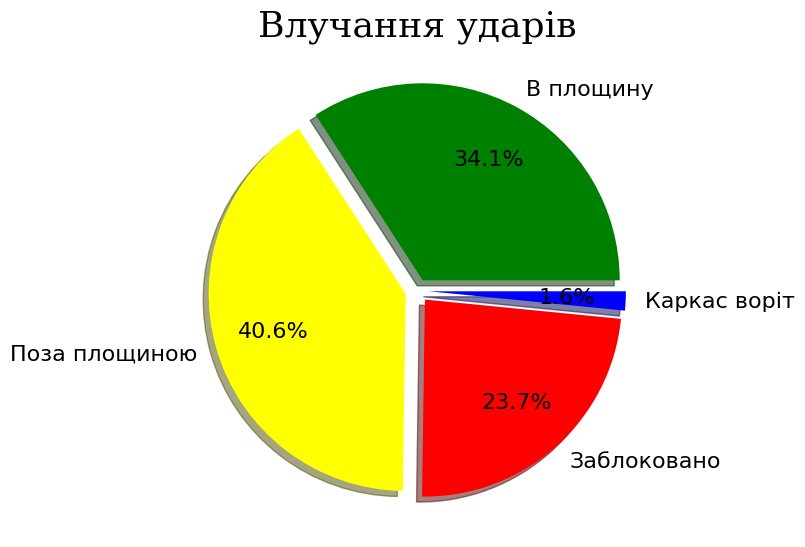

In [207]:
pie = shots[['shot_outcome', 'id_event']].groupby('shot_outcome').count().reset_index().rename(columns={'id_event': 'count'})
pie.shot_outcome = pie.shot_outcome.astype(int)
pie.shot_outcome = pie.shot_outcome.replace({1: 'В площину', 2: 'Поза площиною', 3: 'Заблоковано', 4: 'Каркас воріт'})

fig, ax = plt.subplots(figsize=[8,8])
labels = pie['shot_outcome']
colors = ['green','yellow','red','blue']
plt.pie(x=pie['count'], autopct="%.1f%%", labels=labels, explode=[0.06]*4, pctdistance=0.7, colors=colors, shadow=True, \
       textprops=dict(fontsize=16))
plt.title("Влучання ударів", fontsize=26, fontfamily='serif')
plt.tight_layout()
plt.show()

In [208]:
goals  = shots[['is_goal', 'id_event', 'country']].groupby(['is_goal', 'country']).count().reset_index().rename(columns={'id_event': 'count'})
goals.is_goal = goals.is_goal.replace({1: 'Goal', 0: 'No Goal'})

In [210]:
goals

,is_goal,country,count
0,No Goal,England,30360
1,No Goal,France,43795
2,No Goal,Germany,36916
3,No Goal,Italy,49253
4,No Goal,Spain,44370
5,Goal,England,3552
6,Goal,France,5199
7,Goal,Germany,4621
8,Goal,Italy,5491
9,Goal,Spain,5578


In [211]:
goals['percentage']=0
for i in range(len(goals)):
    for country in goals.country.unique():
        if goals.iloc[i,goals.columns.get_loc("country")]==country:
            goals.iloc[i,goals.columns.get_loc("percentage")]=goals.iloc[i,goals.columns.get_loc("count")] / \
                                                            goals[goals.country==country]['count'].sum()
goals['percentage']=round(goals['percentage']*100,2)

In [212]:
goals

,is_goal,country,count,percentage
0,No Goal,England,30360,89.53
1,No Goal,France,43795,89.39
2,No Goal,Germany,36916,88.87
3,No Goal,Italy,49253,89.97
4,No Goal,Spain,44370,88.83
5,Goal,England,3552,10.47
6,Goal,France,5199,10.61
7,Goal,Germany,4621,11.13
8,Goal,Italy,5491,10.03
9,Goal,Spain,5578,11.17


In [213]:
goals_en = goals.drop(index = [1,2,3,4,6,7,8,9], axis=0)
goals_en

,is_goal,country,count,percentage
0,No Goal,England,30360,89.53
5,Goal,England,3552,10.47


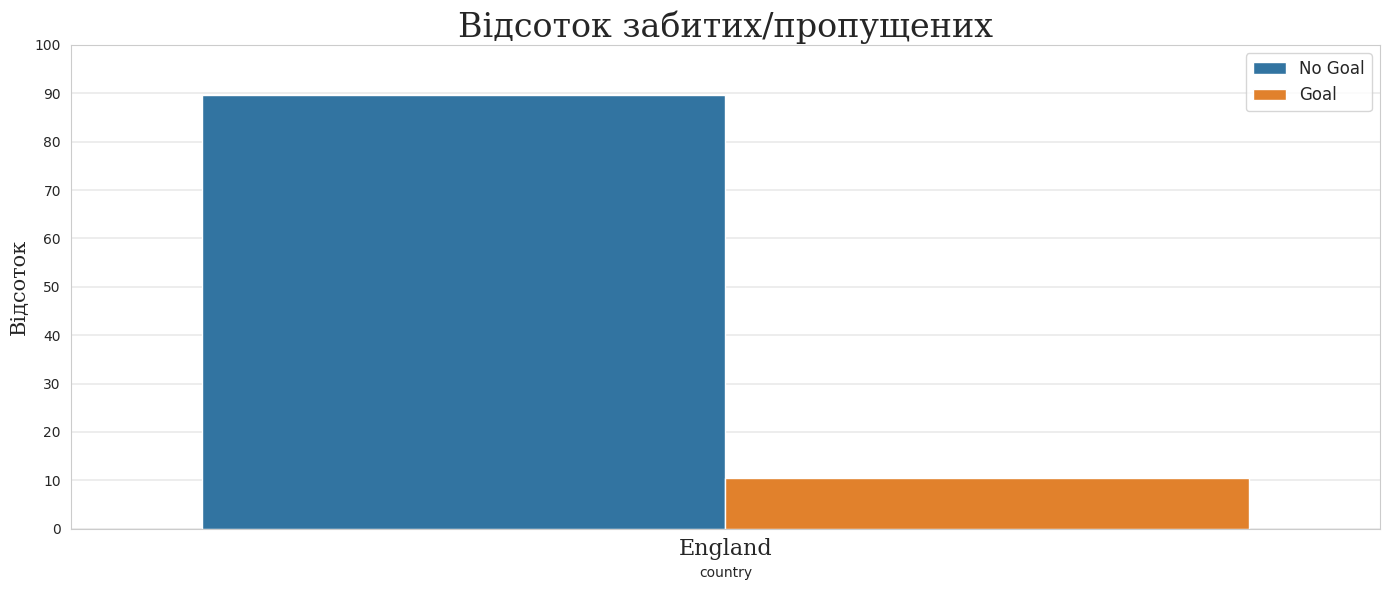

In [215]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[14,6])

ax = sns.barplot(data=goals_en, y='percentage', hue='is_goal', x='country')
ax.set_yticks(np.arange(0,110,10))
ax.set_ylabel(ylabel='Відсоток', fontsize=15, fontfamily='serif')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')
plt.title("Відсоток забитих/пропущених", fontsize=24, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
plt.legend(fontsize=12)

plt.show()

 Тренування моделі очікуваних голів

Розбиваємо поле на зони (робимо їх категорійними)

In [219]:
data = pd.get_dummies(shots.iloc[:,-8:-3], columns=['location', 'bodypart','assist_method', 'situation'])
data.columns = ['fast_break', 'loc_centre_box', 'loc_diff_angle_lr', 'diff_angle_left', 'diff_angle_right',
                'left_side_box', 'left_side_6ybox', 'right_side_box', 'right_side_6ybox', 'close_range',
                'penalty', 'outside_box', 'long_range', 'more_35y', 'more_40y', 'not_recorded', 'right_foot', 
                'left_foot', 'header', 'no_assist', 'assist_pass', 'assist_cross', 'assist_header',
                'assist_through_ball', 'open_play', 'set_piece', 'corner', 'free_kick']
data['is_goal'] = shots['is_goal']

In [220]:
data

,fast_break,loc_centre_box,loc_diff_angle_lr,diff_angle_left,diff_angle_right,left_side_box,left_side_6ybox,right_side_box,right_side_6ybox,close_range,penalty,outside_box,long_range,more_35y,more_40y,not_recorded,right_foot,left_foot,header,no_assist,assist_pass,assist_cross,assist_header,assist_through_ball,open_play,set_piece,corner,free_kick,is_goal
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
14,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
940991,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
940992,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
940993,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [226]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [227]:
y_test

851561    0
744702    1
661032    0
195074    0
742812    0
         ..
175188    1
625826    0
35231     0
730013    0
802045    0
Name: is_goal, Length: 80198, dtype: int64

In [223]:
X_train.dtypes

fast_break             int64
loc_centre_box         uint8
loc_diff_angle_lr      uint8
diff_angle_left        uint8
diff_angle_right       uint8
left_side_box          uint8
left_side_6ybox        uint8
right_side_box         uint8
right_side_6ybox       uint8
close_range            uint8
penalty                uint8
outside_box            uint8
long_range             uint8
more_35y               uint8
more_40y               uint8
not_recorded           uint8
right_foot             uint8
left_foot              uint8
header                 uint8
no_assist              uint8
assist_pass            uint8
assist_cross           uint8
assist_header          uint8
assist_through_ball    uint8
open_play              uint8
set_piece              uint8
corner                 uint8
free_kick              uint8
dtype: object

Gradient Boosting Classifier


In [228]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def model_setup(params): 
    model_g2 = GradientBoostingClassifier(
                        learning_rate=params['learning_rate'],
                        min_samples_leaf=params['min_samples_leaf'],
                        max_depth = params['max_depth'],
                        max_features = params['max_features']
                        )

    model_g2.fit(X_train, y_train)
    return {
        'learning_rate': params['learning_rate'],
        'min_samples_leaf': params['min_samples_leaf'],
        'max_depth': params['max_depth'],
        'max_features': params['max_features'],
        'train_ROCAUC': roc_auc_score(y_train, model_g2.predict_proba(X_train)[:, 1]),
        'test_ROCAUC': roc_auc_score(y_test, model_g2.predict_proba(X_test)[:, 1]),
    }

def objective(params):
    res = model_setup(params)
    res['loss'] = - res['test_ROCAUC']
    res['status'] = STATUS_OK
    return res

search_space = {
        'learning_rate': hp.uniform('learning_rate', 0.05, 0.3),
        'min_samples_leaf': hp.choice('min_samples_leaf', range(15, 200)),
        'max_depth': hp.choice('max_depth', range(2, 20)),
        'max_features': hp.choice('max_features', range(3, 27))
}

In [229]:
trials = Trials()
fmin(
    objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
);

100%|██████████| 50/50 [11:36<00:00, 13.93s/trial, best loss: -0.8194609660698399]


In [230]:
pd.DataFrame(trials.results).sort_values(by='test_ROCAUC', ascending=False).head(5)

,learning_rate,min_samples_leaf,max_depth,max_features,train_ROCAUC,test_ROCAUC,loss,status
47,0.093787,179,8,12,0.817449,0.819461,-0.819461,ok
35,0.079221,193,8,15,0.817475,0.819398,-0.819398,ok
36,0.090100,193,8,15,0.817604,0.819384,-0.819384,ok
38,0.054983,128,8,9,0.817147,0.819355,-0.819355,ok
34,0.104496,193,6,15,0.817215,0.819348,-0.819348,ok


In [232]:
model_g2 = GradientBoostingClassifier(
                        learning_rate=0.093787,
                        min_samples_leaf=179,
                        max_depth = 8,
                        max_features = 12
                        )
model_g2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.093787, max_depth=8, max_features=12,
                           min_samples_leaf=179)

In [234]:
print('ROC-AUC = {}%'.format(round(roc_auc_score(y_test, model_g2.predict_proba(X_test)[:, 1])*100),2))

ROC-AUC = 82%


Text(0.5, 1.0, 'ROC Graph')

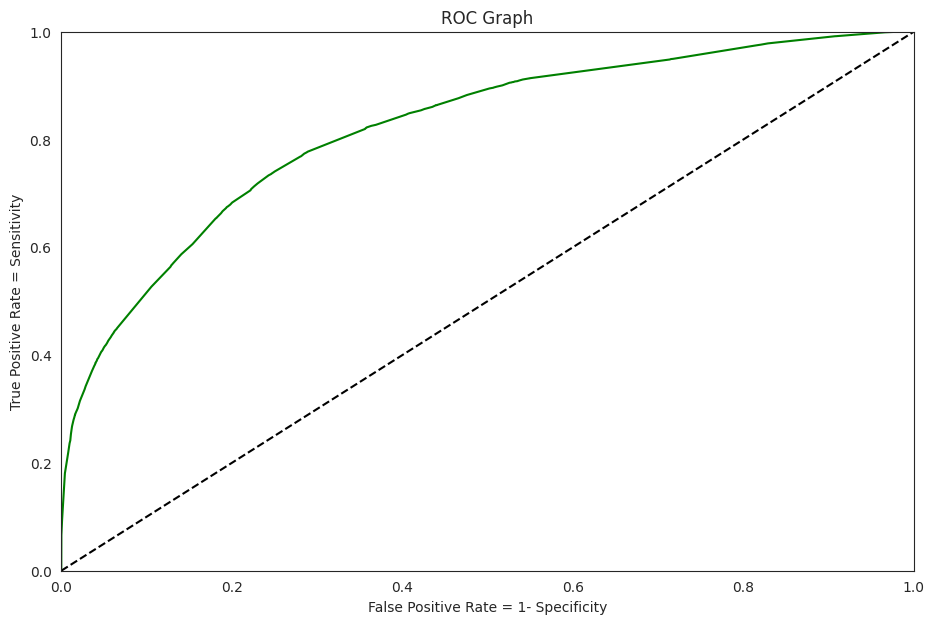

In [235]:
fig, axes = plt.subplots(figsize=(11,7))


fpr, tpr, _  = roc_curve(y_test,model.predict_proba(X_test)[:, 1])
plt.plot(fpr,tpr,label='Distance Predictor',c='green')


y_45 = np.linspace(0,1,100) 
plt.plot(y_45,y_45,linestyle='dashed',c='black')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC Graph')

Логістична регресія

In [237]:
model_22 = LogisticRegression(max_iter=600)
model_22.fit(X_train, y_train)

LogisticRegression(max_iter=600)

In [239]:
print('ROC-AUC = {}%'.format(round(roc_auc_score(y_test, model_22.predict_proba(X_test)[:, 1])*100),2))

ROC-AUC = 82%


Text(0.5, 1.0, 'ROC-крива')

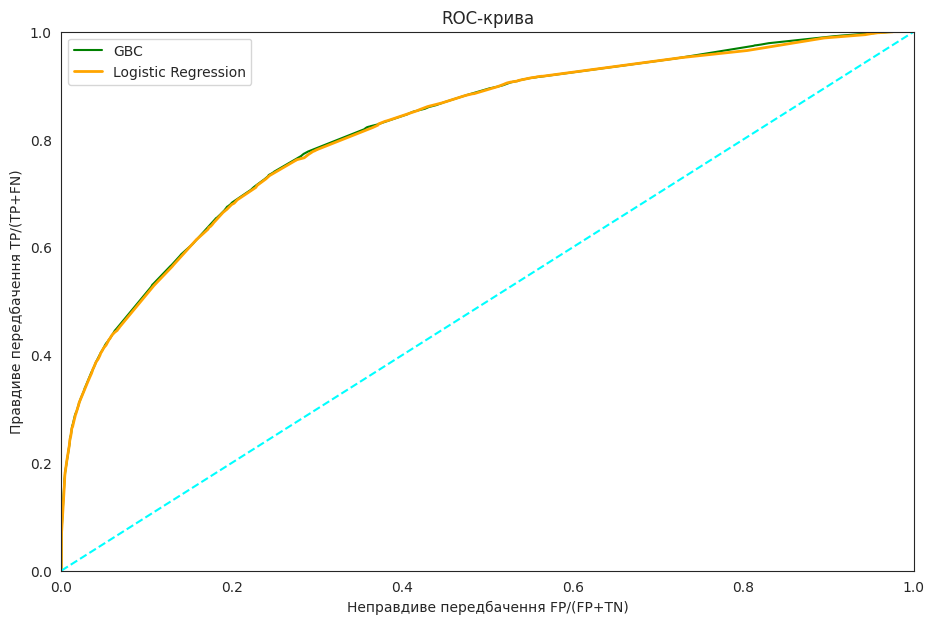

In [241]:
fig, axes = plt.subplots(figsize=(11,7))

fpr, tpr, _  = roc_curve(y_test,model_g2.predict_proba(X_test)[:, 1])
plt.plot(fpr,tpr,label='GBC',c='green')

fpr2, tpr2, _  = roc_curve(y_test, model_22.predict_proba(X_test)[:, 1])
plt.plot(fpr2,tpr2,label='Logistic Regression',c='orange',linewidth=2)

y_45 = np.linspace(0,1,100) 
plt.plot(y_45,y_45,linestyle='dashed',c='cyan')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(['GBC','Logistic Regression'])
plt.xlabel('Неправдиве передбачення FP/(FP+TN)')
plt.ylabel('Правдиве передбачення TP/(TP+FN)')
plt.title('ROC-крива')

In [242]:
eli5.explain_weights(model, feature_names=list(X_train.columns))

Weight,Feature
0.2185 ± 0.1716,not_recorded
0.2059 ± 0.1385,close_range
0.1701 ± 0.1371,penalty
0.0850 ± 0.1296,outside_box
0.0632 ± 0.1157,loc_centre_box
0.0598 ± 0.0855,fast_break
0.0431 ± 0.0732,set_piece
0.0277 ± 0.0611,assist_through_ball
0.0237 ± 0.1001,assist_cross
0.0206 ± 0.0858,header


#Використання на практиці
##Експерименти з гравцями

додамо колонку xG для кожного удару

In [252]:
shots['xG'] = model.predict_proba(X)[:, 1]
shots['difference'] = shots['xG'] - shots['is_goal']

In [253]:
shots

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,year,difference,xG
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,Mladen Petric,Gokhan Tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0,Germany,2011-08-05,2011,0.048559,0.048559
11,UFot0hit/,UFot0hit12,12,14,Attempt missed. Shinji Kagawa (Borussia Dortmu...,1,12.0,1,Borussia Dortmund,Hamburg SV,Shinji Kagawa,Mario Gotze,NaN,NaN,13.0,2.0,0,15.0,1.0,1,1.0,0,Germany,2011-08-05,2011,0.029028,0.029028
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,Kevin Grosskreutz,Mario Gotze,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0,Germany,2011-08-05,2011,-0.951441,0.048559
14,UFot0hit/,UFot0hit15,15,19,Attempt blocked. Mats Hummels (Borussia Dortmu...,1,NaN,1,Borussia Dortmund,Hamburg SV,Mats Hummels,NaN,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0,Germany,2011-08-05,2011,0.020759,0.020759
17,UFot0hit/,UFot0hit18,18,20,Attempt blocked. Tomas Rincon (Hamburg) right ...,1,NaN,2,Hamburg SV,Borussia Dortmund,Tomas Rincon,NaN,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0,Germany,2011-08-05,2011,0.020759,0.020759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,z5L2OT5E/,z5L2OT5E102,102,81,Attempt blocked. Remo Freuler (Atalanta) right...,1,NaN,1,Atalanta,Sampdoria,Remo Freuler,NaN,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0,Italy,2017-01-22,2017,0.020759,0.020759
940991,z5L2OT5E/,z5L2OT5E110,110,84,Attempt missed. Alberto Grassi (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,Alberto Grassi,Remo Freuler,NaN,NaN,10.0,2.0,0,15.0,1.0,1,1.0,0,Italy,2017-01-22,2017,0.029028,0.029028
940992,z5L2OT5E/,z5L2OT5E111,111,86,Attempt saved. Alejandro Gomez (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,Alejandro Gomez,Andrea Petagna,NaN,NaN,5.0,1.0,0,9.0,1.0,1,1.0,0,Italy,2017-01-22,2017,0.050062,0.050062
940993,z5L2OT5E/,z5L2OT5E112,112,87,Attempt saved. Fabio Quagliarella (Sampdoria) ...,1,12.0,2,Sampdoria,Atalanta,Fabio Quagliarella,Luis Muriel,NaN,NaN,5.0,1.0,0,15.0,1.0,1,1.0,0,Italy,2017-01-22,2017,0.029028,0.029028


Для кожного гравця визначимо різницю між кількістю забитих і очікуваних голів.

In [263]:
players = shots.groupby('player').sum().reset_index()
players.rename(columns={'is_goal': 'trueGoals'}, inplace=True)
players.xG = round(players.xG,2)
players.xG = round(players.xG,2)

<ipython-input-263-3cb536448264>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  players = shots.groupby('player').sum().reset_index()


In [265]:
players

,player,sort_order,time,event_type,event_type2,side,shot_place,shot_outcome,trueGoals,location,bodypart,assist_method,situation,fast_break,year,difference,xG,ratio
0,Aaron,2466,2335,48,432.0,70,284.0,92.0,1,560.0,62.0,43,53.0,0,96689,2.50,3.50,0.285714
1,Aaron Cresswell,2215,2384,52,408.0,75,317.0,107.0,4,629.0,103.0,38,66.0,2,104795,-0.54,3.46,1.156069
2,Aaron Hughes,56,55,1,15.0,2,0.0,0.0,1,19.0,1.0,0,1.0,0,2013,-0.02,0.98,1.020408
3,Aaron Hunt,12387,10517,215,1563.0,278,1075.0,428.0,25,2524.0,409.0,181,274.0,7,432783,1.40,26.40,0.946970
4,Aaron Lennon,2521,2747,57,480.0,85,278.0,112.0,8,557.0,69.0,55,66.0,1,114843,-2.74,5.26,1.520913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,Zoltan Stieber,3610,2999,56,420.0,80,298.0,101.0,6,556.0,101.0,48,77.0,3,112760,-0.53,5.47,1.096892
4783,Zouhaier Dhaouadhi,251,195,3,0.0,4,30.0,5.0,0,45.0,6.0,0,6.0,0,6036,0.04,0.04,0.000000
4784,Zouhaier Dhaouadi,142,167,2,24.0,4,6.0,3.0,1,6.0,4.0,2,2.0,0,4024,-0.67,0.33,3.030303
4785,Zouhair Feddal,1716,1613,30,324.0,43,208.0,61.0,1,200.0,79.0,49,55.0,0,60463,2.99,3.99,0.250627


Виведу кращих та гірших гравців за різницею забитих і очікуваних

In [277]:
show = players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'difference', 'trueGoals', 'xG']].head(10)
show.head(10)

,rank,player,difference,trueGoals,xG
0,1,Lionel Messi,-58.91,205,146.09
1,2,Zlatan Ibrahimovic,-33.85,153,119.15
2,3,Cristiano Ronaldo,-32.39,198,165.61
3,4,Gonzalo Higuain,-31.62,118,86.38
4,5,Luis Suarez,-31.58,96,64.42
5,6,Robert Lewandowski,-26.99,124,97.01
6,7,Alexandre Lacazette,-25.86,88,62.14
7,8,Alexis Sanchez,-22.40,80,57.60
8,9,Karim Benzema,-22.36,85,62.64
9,10,Antoine Griezmann,-20.87,80,59.13


In [275]:
show = players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'difference', 'trueGoals', 'xG']].tail(10)
show.tail(10)

,rank,player,difference,trueGoals,xG
4777,4778,Diego Godin,7.96,12,19.96
4778,4779,Roberto Trashorras,7.98,6,13.98
4779,4780,Bostjan Cesar,8.17,4,12.17
4780,4781,Riccardo Meggiorini,8.19,15,23.19
4781,4782,Mario Balotelli,8.40,36,44.40
4782,4783,Adrian Mutu,8.47,17,25.47
4783,4784,Giampaolo Pazzini,8.53,31,39.53
4784,4785,Mats Hummels,9.05,10,19.05
4785,4786,Amauri,12.08,20,32.08
4786,4787,Jesus Navas,14.74,9,23.74
